<a href="https://colab.research.google.com/github/jashanmeet-collab/ML-Optimizers/blob/main/LinearRegression/Classifier_SyntheticDataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More complex synthetic datasets

In [2]:
# Linear Regression Class

# Useful import
import numpy as np
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression


In [55]:
import random 

#making some fake data
num_points = 50

random_range = 100
intercept = 4
slope = 3

intercept_expected = intercept+ random_range/2.0 


def createData(num_points):
  X = []
  Y = []

  for i in range(num_points):
    X.append(i)
    y = slope*i*i + slope*i + intercept + random.random()*random_range*i
    Y.append(y)
  
  return X, Y

In [56]:
# create training data 

X_train, Y_train =  createData(num_points)

In [57]:
# create test data

X_test, Y_test =  createData(num_points)

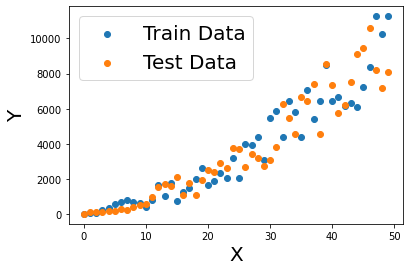

In [58]:
# visualize the train and test data

from matplotlib import pyplot as plt
plt.scatter(X_train,Y_train, label = 'Train Data')
plt.scatter(X_test, Y_test, label = 'Test Data')
plt.legend(fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()


In [59]:
# training a linear classifier
X_train_input = np.array(X_train)
X_train_input = X_train_input.reshape(X_train_input.shape[0], 1)
reg = LinearRegression().fit(X_train_input, Y_train)

In [60]:
X_test_input = np.array(X_test)
X_test_input = X_test_input.reshape(X_test_input.shape[0], 1)
Y_predict = reg.predict(X_test_input)

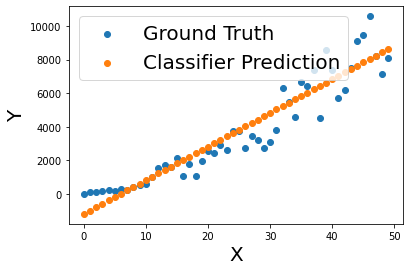

In [61]:
# See the predict

from matplotlib import pyplot as plt
plt.scatter(X_test,Y_test, label = 'Ground Truth')
plt.scatter(X_test, Y_predict, label = 'Classifier Prediction')
plt.legend(fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()


In [62]:
# Making features with higher power of X


# training a quadratic classifier
X_train_input = []
for x in X_train:
  X_train_input.append([x, x*x])

X_train_input = np.array(X_train_input)
reg = LinearRegression().fit(X_train_input, Y_train)

In [63]:
# prediction
X_test_input = []
for x in X_test:
  X_test_input.append([x, x*x])

X_test_input = np.array(X_test_input)
Y_predict2 = reg.predict(X_test_input)

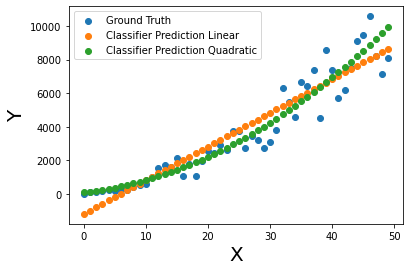

In [64]:
# See the predict

from matplotlib import pyplot as plt
plt.scatter(X_test,Y_test, label = 'Ground Truth')
plt.scatter(X_test, Y_predict, label = 'Classifier Prediction Linear')
plt.scatter(X_test, Y_predict2, label = 'Classifier Prediction Quadratic')

plt.legend(fontsize = 10)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()


# Many powers of x

In [65]:
def transformX(X_input, degree = 5):
  X_transformed = []

  for x in X_input:
    elem = []
    for i in range(1, degree+1):
      elem.append(x**i)

    X_transformed.append(elem) # elem = [x, x*x, x*x*x, ..., x*x*x*x*x]
  
  return X_transformed

In [76]:
X_train_input  = transformX(X_train, 20)

In [77]:
X_train_input = np.array(X_train_input)
X_train_input.shape

(50, 20)

In [78]:
reg = LinearRegression().fit(X_train_input, Y_train)

In [79]:
y_train_predict = reg.predict(X_train_input)

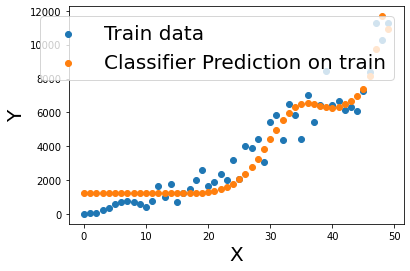

In [80]:
# See the training predict

from matplotlib import pyplot as plt
plt.scatter(X_train,Y_train, label = 'Train data')
plt.scatter(X_train, y_train_predict, label = 'Classifier Prediction on train')
plt.legend(fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()


In [81]:
# See the test prediction

X_test_input  = transformX(X_test, 20)
X_test_input= np.array(X_test_input)

y_test_predict = reg.predict(X_test_input)

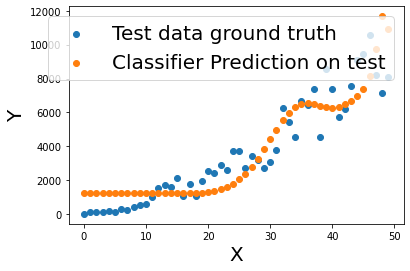

In [82]:
# See the test prediction

from matplotlib import pyplot as plt
plt.scatter(X_test,Y_test, label = 'Test data ground truth')
plt.scatter(X_test, y_test_predict, label = 'Classifier Prediction on test')
plt.legend(fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()
